About this dataset

Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
type(data)
data.shape

(303, 14)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
# To identify null values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [39]:
# Checking for duplicate records.
data.duplicated().sum()

1

In [40]:
#dropping duplicated record
data.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Text(0.5, 1.0, 'Count of test subjects by Gender')

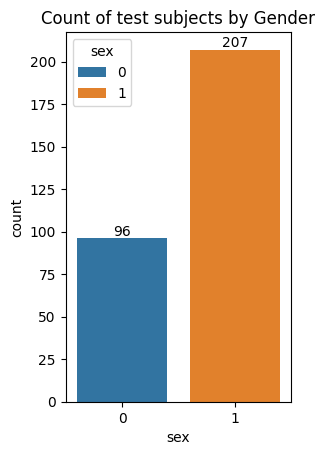

In [42]:
# Count of test subjects based on gender
plt.subplot(1, 2, 1)
ax=sns.countplot(x='sex', data=data, hue="sex")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count of test subjects by Gender')

<ipython-input-43-4412ae964a93>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"))


<Axes: xlabel='age', ylabel='Density'>

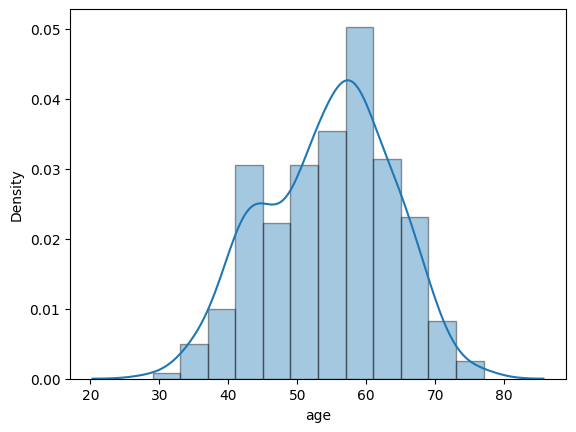

In [43]:
sns.distplot(data["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<ipython-input-44-3b71ff4ce346>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"))


<Axes: xlabel='trtbps', ylabel='Density'>

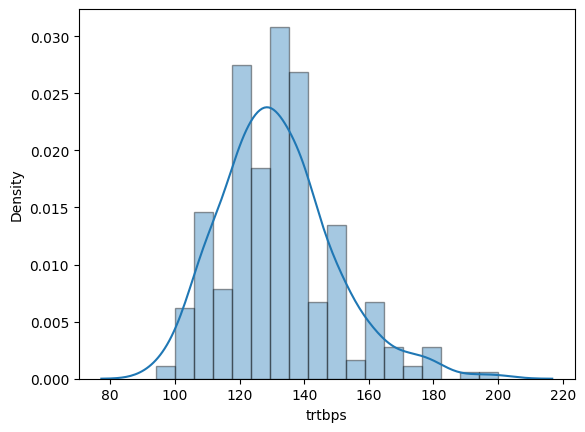

In [44]:
sns.distplot(data["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<ipython-input-45-c1e5de1e6261>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["chol"], hist_kws = dict(linewidth = 1, edgecolor = "k"))


<Axes: xlabel='chol', ylabel='Density'>

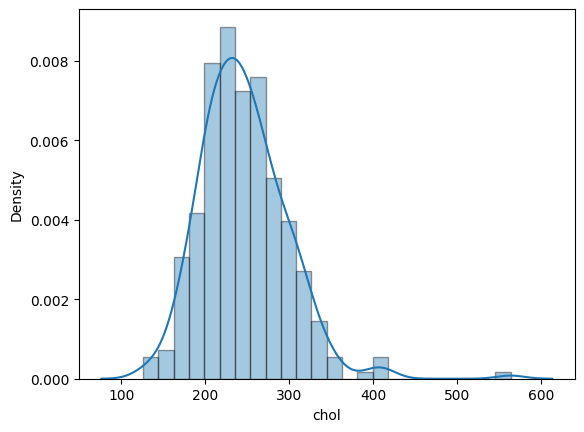

In [45]:
sns.distplot(data["chol"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

<ipython-input-46-974229ddd291>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["thalachh"], hist_kws = dict(linewidth = 1, edgecolor = "k"))


<Axes: xlabel='thalachh', ylabel='Density'>

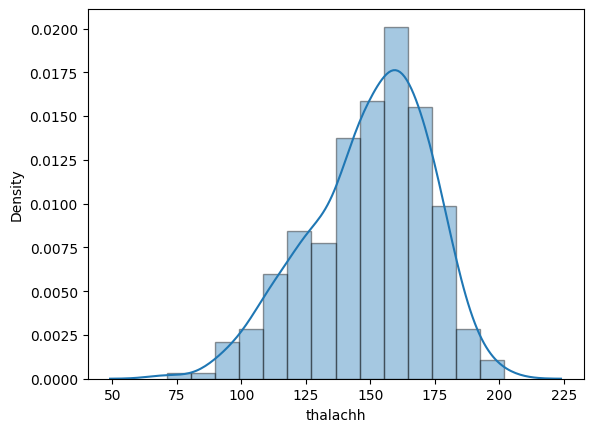

In [46]:
sns.distplot(data["thalachh"], hist_kws = dict(linewidth = 1, edgecolor = "k"))

In [47]:
# Separate features and target
X = data.drop('output', axis=1)
y = data['output']

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [52]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



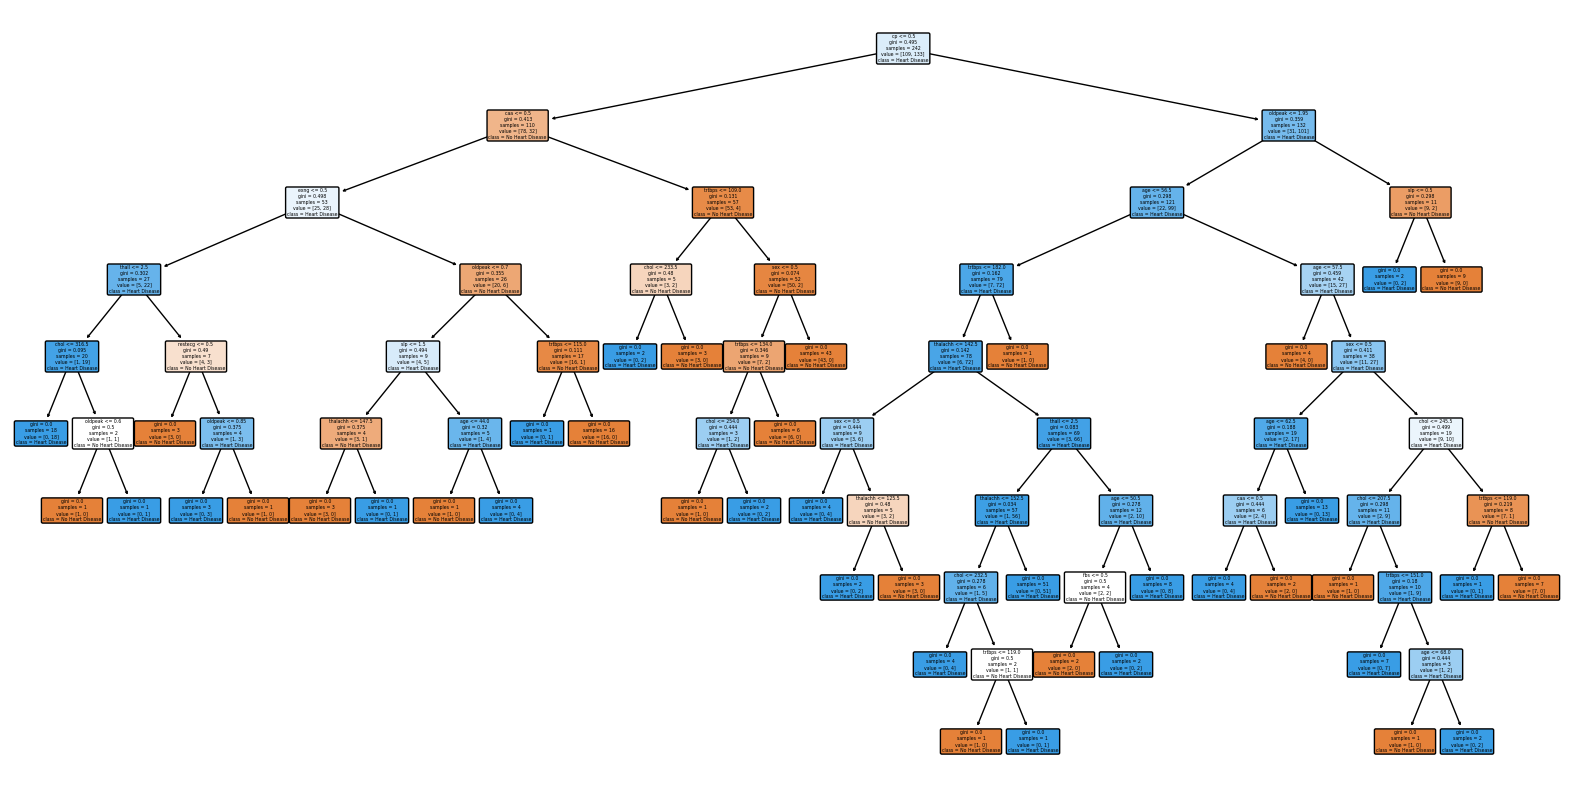

In [56]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True, rounded=True)
plt.savefig('heart_disease_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

In [54]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
     feature  importance
2         cp    0.225263
11       caa    0.118478
9    oldpeak    0.113268
0        age    0.106735
4       chol    0.093679
3     trtbps    0.081394
8       exng    0.075421
7   thalachh    0.046207
1        sex    0.041015
10       slp    0.038537
12     thall    0.027214
5        fbs    0.016693
6    restecg    0.016097


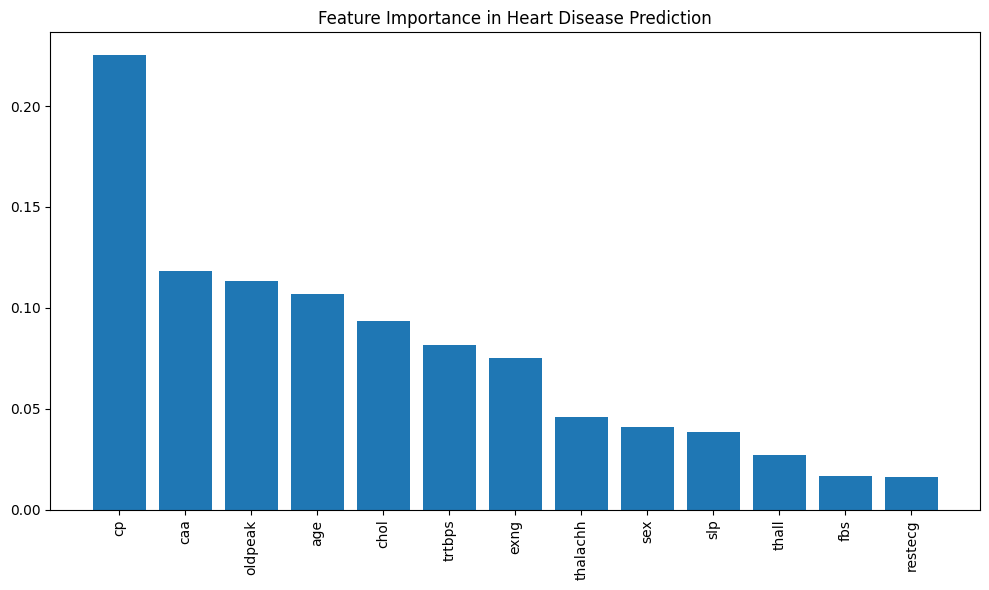

In [58]:
# Visualize feature importance
plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importance in Heart Disease Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()